In [39]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

In [40]:
using LinearAlgebra
using PyPlot

In [41]:
ℓ = 1.0
m = 1.0
g = 9.81
function f(x)
    #pendulum dynamics
    
    θ = x[1]
    θ̇ = x[2]
    
    ẋ = [θ̇; -(g/ℓ)*sin(θ)]
end

f (generic function with 1 method)

In [42]:
function euler_step(xk)
    xn = xk + h*f(xk)
end

euler_step (generic function with 1 method)

In [43]:
function simulate!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= euler_step(xtraj[:,k])
    end
end

simulate! (generic function with 1 method)

In [64]:
Tf = 10.0
h = 0.001 #20 Hz
N = Int(floor(Tf./h + 1))
thist = h.*Array(0:(N-1));

In [65]:
x0 = [5*(pi/180); 0.0]
xtraj = zeros(2,N)
xtraj[:,1] = x0;

In [66]:
simulate!(xtraj, N)

In [49]:
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo

vis = Visualizer()
TrajOptPlots.set_mesh!(vis, RobotZoo.Pendulum())
render(vis)

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("rod" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x72, 0x6f, 0x64], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "hinge" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x68, 0x69, 0x6e, 0x67, 0x65], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "mass" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x6d, 0x61, 0x73, 0x73], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))))), Set{Any}(), ip"127.0.0.1", 8702))

In [60]:
X1 = [SVector{2}(x) for x in eachcol(xtraj)];
visualize!(vis, RobotZoo.Pendulum(), thist[end], X1)

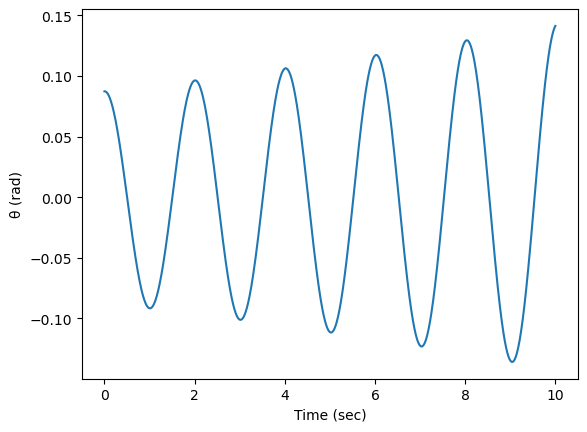

PyObject Text(24.0, 0.5, 'θ (rad)')

In [61]:
plot(thist,xtraj[1,:])
xlabel("Time (sec)")
ylabel("θ (rad)")

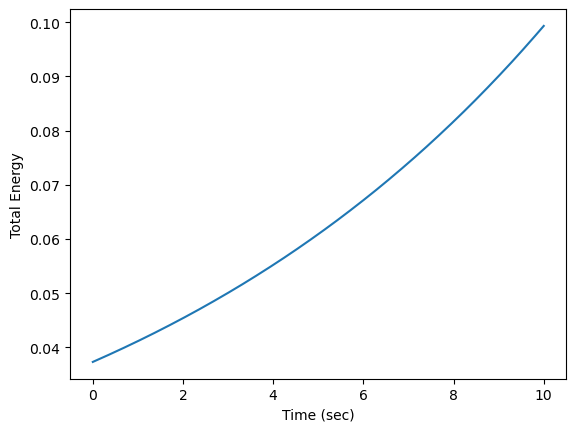

PyObject Text(24.000000000000007, 0.5, 'Total Energy')

In [62]:
#Let's plot the total energy of the system
Ehist = 0.5*m*ℓ^2*(xtraj[2,:].^2) .+ m*g*ℓ*(1.0.-cos.(xtraj[1,:]))

plot(thist,Ehist)
xlabel("Time (sec)")
ylabel("Total Energy")